## **CNN Model for Single Audio Event Detection**


In [ ]:
import numpy 
import os
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initialize all path variables
dir_path = '/content/drive/MyDrive/Audio_Classification-MLSP'
train_data_path=os.path.join(dir_path, "train")

In [ ]:
# load data from 'annotations.csv' 
data=pd.read_csv(os.path.join(dir_path, "annotations.csv"))

### **Preprocessing data**

In [ ]:
#List containing all spectrograms
mel_spectrograms=[] 

for file in data['fname']:
  arr=numpy.load(os.path.join(train_data_path, file))
  m,n,o=arr.shape
  print(m, n, o)
  arr.resize(n,o)
  print(arr.shape)
  # Convert a power spectrogram (amplitude squared) to decibel (dB) units
  mel_spectrogram = librosa.power_to_db(arr, ref=numpy.max)
  # mfcc = librosa.features.mfcc(mel_spect)
  mel_spectrograms.append(mel_spectrogram)

1 128 314
(128, 314)
1 128 2504
(128, 2504)
1 128 236
(128, 236)
1 128 1070
(128, 1070)
1 128 272
(128, 272)
1 128 70
(128, 70)
1 128 664
(128, 664)
1 128 1421
(128, 1421)
1 128 432
(128, 432)
1 128 200
(128, 200)
1 128 1211
(128, 1211)
1 128 2512
(128, 2512)
1 128 52
(128, 52)
1 128 868
(128, 868)
1 128 106
(128, 106)
1 128 34
(128, 34)
1 128 2512
(128, 2512)
1 128 2584
(128, 2584)
1 128 72
(128, 72)
1 128 32
(128, 32)
1 128 44
(128, 44)
1 128 194
(128, 194)
1 128 100
(128, 100)
1 128 224
(128, 224)
1 128 1506
(128, 1506)
1 128 269
(128, 269)
1 128 518
(128, 518)
1 128 586
(128, 586)
1 128 100
(128, 100)
1 128 194
(128, 194)
1 128 41
(128, 41)
1 128 359
(128, 359)
1 128 282
(128, 282)
1 128 94
(128, 94)
1 128 314
(128, 314)
1 128 1701
(128, 1701)
1 128 240
(128, 240)
1 128 55
(128, 55)
1 128 2512
(128, 2512)
1 128 1114
(128, 1114)
1 128 230
(128, 230)
1 128 47
(128, 47)
1 128 272
(128, 272)
1 128 309
(128, 309)
1 128 259
(128, 259)
1 128 1512
(128, 1512)
1 128 2357
(128, 2357)
1 128 6

In [ ]:
# The data provided has constant frequency scale in spectrogram.
# But, the duration(time) is different for all the provided samples.
# Hence, it is necessary to pad the data

# get the max_length of spectrograms in the time axis
max_duration=0
for spec in mel_spectrograms:
  m,n=spec.shape
  if max_duration<n:
      max_duration=n

# add padding in the given .npy files
features=[]
for spec in mel_spectrograms:
  mat=numpy.pad(spec, [(0, 0), (0, max_duration-spec[0].size)], mode='constant', constant_values=0)
  mat=mat.reshape((mat.shape[0], mat.shape[1], 1))
  features.append(mat)

In [ ]:
# convert features list into numpy.ndarray type
features=numpy.array(features)

In [ ]:
data['label'].describe()

count     1000
unique      10
top       Bark
freq       100
Name: label, dtype: object

In [ ]:
# need to convert training data into tensor datatype
i=0
for _ in features:
    features[i]= tf.convert_to_tensor(features[i])
    i=i+1

### **Splitting Dataset into training and validation**

In [ ]:
X=features
y=data['label']

# used 'random_state' of 40 while splitting to get the balanced split of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle="true")

In [ ]:
# get the count of classes present in y_test
print(type(y_test))
val_label=pd.Series(list(y_test))
val_label.value_counts()

<class 'pandas.core.series.Series'>


Bark                                     22
Walk_and_footsteps                       22
Doorbell                                 22
Crying_and_sobbing                       21
Siren                                    20
Knock                                    20
Vehicle_horn_and_car_horn_and_honking    20
Microwave_oven                           19
Shatter                                  17
Meow                                     17
dtype: int64

### **Convert label data (y_train & y_test) into 'one-hot vector' format**

In [ ]:
for i in y_train:
  print(i)

Walk_and_footsteps
Meow
Bark
Meow
Shatter
Crying_and_sobbing
Shatter
Doorbell
Crying_and_sobbing
Walk_and_footsteps
Shatter
Crying_and_sobbing
Vehicle_horn_and_car_horn_and_honking
Meow
Crying_and_sobbing
Doorbell
Meow
Knock
Knock
Meow
Bark
Shatter
Crying_and_sobbing
Doorbell
Microwave_oven
Shatter
Knock
Microwave_oven
Vehicle_horn_and_car_horn_and_honking
Siren
Shatter
Bark
Microwave_oven
Walk_and_footsteps
Walk_and_footsteps
Doorbell
Bark
Crying_and_sobbing
Bark
Walk_and_footsteps
Microwave_oven
Knock
Doorbell
Vehicle_horn_and_car_horn_and_honking
Doorbell
Meow
Shatter
Vehicle_horn_and_car_horn_and_honking
Meow
Vehicle_horn_and_car_horn_and_honking
Microwave_oven
Shatter
Siren
Vehicle_horn_and_car_horn_and_honking
Shatter
Walk_and_footsteps
Meow
Crying_and_sobbing
Knock
Doorbell
Siren
Shatter
Knock
Walk_and_footsteps
Walk_and_footsteps
Doorbell
Crying_and_sobbing
Meow
Shatter
Shatter
Meow
Doorbell
Walk_and_footsteps
Doorbell
Doorbell
Knock
Meow
Knock
Shatter
Vehicle_horn_and_car_horn

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

train_encoder = LabelEncoder()
train_ = train_encoder.fit_transform(y_train)
to_onehot=to_categorical(train_)
y_train=to_onehot

test_encoder = LabelEncoder()
test_ = test_encoder.fit_transform(y_test)
to_onehot=to_categorical(test_)
y_test=to_onehot

In [ ]:
for i in y_train:
  print(numpy.argmax(i))

9
4
0
4
6
1
6
2
1
9
6
1
8
4
1
2
4
3
3
4
0
6
1
2
5
6
3
5
8
7
6
0
5
9
9
2
0
1
0
9
5
3
2
8
2
4
6
8
4
8
5
6
7
8
6
9
4
1
3
2
7
6
3
9
9
2
1
4
6
6
4
2
9
2
2
3
4
3
6
8
8
5
7
7
6
7
1
4
3
8
6
0
4
4
7
8
2
3
8
0
4
8
5
4
8
2
4
8
4
6
8
6
7
9
2
5
8
1
5
6
5
8
2
1
4
1
7
6
8
1
1
5
7
6
6
2
4
6
9
4
4
9
9
4
0
9
0
0
1
7
1
6
4
0
9
8
9
2
3
7
9
4
6
5
4
2
4
3
0
1
3
7
4
8
7
1
3
2
1
7
6
4
6
2
9
6
9
9
5
6
4
8
1
9
3
7
3
6
6
5
2
3
6
9
8
7
3
4
0
4
3
7
4
6
1
9
5
6
3
5
5
0
2
7
0
6
0
0
3
9
0
5
3
5
0
9
9
3
0
8
4
3
4
3
5
7
7
0
4
2
4
2
0
4
3
4
8
6
6
4
5
6
3
7
7
3
1
0
5
7
0
7
7
7
6
5
4
7
0
7
0
1
8
7
8
5
3
2
7
4
4
9
1
7
5
0
6
6
7
3
7
2
2
5
6
7
3
0
0
0
8
5
9
4
4
7
4
6
3
0
0
1
4
6
8
3
0
5
8
3
9
5
6
5
2
5
2
9
3
8
8
8
2
9
7
6
6
5
8
0
2
1
9
3
9
5
4
7
6
0
4
6
1
8
1
8
3
1
1
3
1
2
2
7
6
9
1
3
2
7
9
4
7
8
5
1
0
9
6
0
3
9
5
4
6
0
2
3
4
5
1
1
2
3
7
8
3
9
9
2
2
1
0
0
6
3
5
5
1
4
5
0
5
8
4
1
0
4
8
0
5
0
0
1
5
4
6
3
6
1
9
6
3
2
8
1
3
6
7
3
1
8
1
2
6
2
5
7
2
3
9
3
5
2
8
2
5
1
7
6
0
4
0
0
4
2
6
8
8
7
3
2
8
9
4
4
3
9
3
1
2
5
1
9
5
1
5
2
0
8


Definitions for recall, precision and f1 metrics

In [ ]:
# reference: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend 
from sklearn.metrics import precision_score , recall_score
def recall_m(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = backend.sum(backend.round(backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = backend.sum(backend.round(backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+backend.epsilon())) 

### **CNN Model**

In [ ]:
pool_size = (2, 2)
kernel_size = (3, 3)
input_shape = (128, 2584, 1)
num_classes = 10

In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(32, kernel_size,
                padding="same", input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.25),
    #second_convolution
    tf.keras.layers.Conv2D(64, kernel_size,
                                  padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    #third_convolution
    tf.keras.layers.Conv2D(128, kernel_size,
                                  padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    #fourth_convolution
    tf.keras.layers.Conv2D(256, kernel_size,
                                  padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    # tf.keras.layers.Dropout(0.25),
    #Fully connected 1st layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax') 
]) 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 2584, 32)     320       
                                                                 
 batch_normalization_20 (Bat  (None, 128, 2584, 32)    128       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 128, 2584, 32)     0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 1292, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 1292, 64)      18496     
                                                                 
 batch_normalization_21 (Bat  (None, 64, 1292, 64)    

In [ ]:
# compile the model using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
          loss=tf.keras.losses.CategoricalCrossentropy(),
          metrics=["accuracy", f1_m, precision_m, recall_m])

### **Training**

In [ ]:
# To keep track of the best metrices obtained while training the model
from keras.callbacks import ModelCheckpoint

filepath = '/content/drive/MyDrive/Audio_Classification-MLSP/my_best_model_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=160, verbose = 1, callbacks=[checkpoint])

Epoch 1/160
25/25 [==============================] - ETA: 0s - loss: 5.6475 - accuracy: 0.1225 - f1_m: 0.0820 - precision_m: 0.1534 - recall_m: 0.0613
Epoch 1: val_loss improved from inf to 2.41383, saving model to /content/drive/MyDrive/Audio_Classification-MLSP/my_best_model_cnn.hdf5
25/25 [==============================] - 30s 587ms/step - loss: 5.6475 - accuracy: 0.1225 - f1_m: 0.0820 - precision_m: 0.1534 - recall_m: 0.0613 - val_loss: 2.4138 - val_accuracy: 0.0900 - val_f1_m: 0.0173 - val_precision_m: 0.2857 - val_recall_m: 0.0089
Epoch 2/160
25/25 [==============================] - ETA: 0s - loss: 2.8509 - accuracy: 0.1425 - f1_m: 0.0507 - precision_m: 0.2086 - recall_m: 0.0300
Epoch 2: val_loss improved from 2.41383 to 2.33968, saving model to /content/drive/MyDrive/Audio_Classification-MLSP/my_best_model_cnn.hdf5
25/25 [==============================] - 14s 577ms/step - loss: 2.8509 - accuracy: 0.1425 - f1_m: 0.0507 - precision_m: 0.2086 - recall_m: 0.0300 - val_loss: 2.3397 -

### **Plots and Evaluation Metrices**

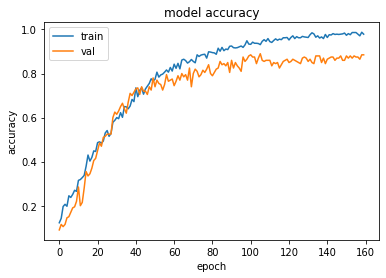

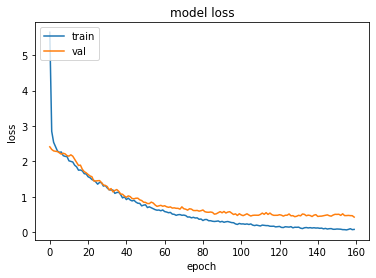

In [ ]:
from matplotlib import pyplot as plt
model.metrics_names
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix, heatmap and evalution metrics

7/7 [==============================] - 1s 149ms/step - loss: 0.4302 - accuracy: 0.8850 - f1_m: 0.9071 - precision_m: 0.9175 - recall_m: 0.8973
Validation-loss: 0.43016278743743896
Accuracy: 0.8849999904632568
F1 Score: 0.9070689082145691
Precision: 0.9175373315811157
Recall: 0.8973214030265808
confusion matrix
[[21  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  1  0  0  0  1  0]
 [ 1  0 18  0  0  0  2  0  0  1]
 [ 0  0  0 17  0  0  2  0  0  1]
 [ 0  2  0  0 15  0  0  0  0  0]
 [ 0  0  2  0  0 17  0  0  0  0]
 [ 0  0  0  2  0  1 14  0  0  0]
 [ 0  0  0  0  0  0  0 19  1  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 1  0  0  2  2  0  0  0  0 17]]


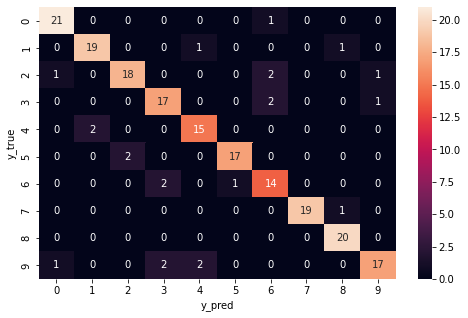

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Validation-loss:', accuracy[0])
print('Accuracy:', accuracy[1])
print('F1 Score:', accuracy[2])
print('Precision:', accuracy[3])
print('Recall:', accuracy[4])
pred=model.predict(X_test)
y_pred = numpy.argmax(pred, axis=1)
y_true = numpy.argmax(y_test, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()